In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import pickle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from recommenders.datasets import movielens
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

In [3]:
# Tải dữ liệu
df = movielens.load_pandas_df(
    size="100k",
    header=["userId", "movieId", "rating", "timestamp"]
)
df = df[["userId", "movieId", "rating"]]
print(df.head())

100%|██████████| 4.81k/4.81k [00:03<00:00, 1.41kKB/s]


   userId  movieId  rating
0     196      242     3.0
1     186      302     3.0
2      22      377     1.0
3     244       51     2.0
4     166      346     1.0


In [4]:
# ma hoa
user_enc = LabelEncoder()
item_enc = LabelEncoder()
df["userId_enc"] = user_enc.fit_transform(df["userId"])
df["movieId_enc"] = item_enc.fit_transform(df["movieId"])

In [5]:
# Chuẩn hóa
scaler = StandardScaler()
df[["userId_enc", "movieId_enc"]] = scaler.fit_transform(df[["userId_enc", "movieId_enc"]])

df.head()

,userId,movieId,rating,userId_enc,movieId_enc
0,196,242,3.0,-0.999519,-0.554812
1,186,302,3.0,-1.037026,-0.373432
2,22,377,1.0,-1.652150,-0.146707
3,244,51,2.0,-0.819482,-1.132206
4,166,346,1.0,-1.112041,-0.240420


In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
X = df[["userId_enc", "movieId_enc"]]
y = df["rating"]

In [8]:
#chia du lieu va huan luyen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# danh gia model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 0.905
MSE: 1.211
RMSE: 1.100


In [10]:
#chay thuc nghiem 10 lan
rmse_list = []
mae_list = []
mse_list = []
time_train = []
time_test = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    st = time.time()
    model = LinearRegression()
    model.fit(X_train, y_train)
    et = time.time() - st
    time_train.append(et)

    st = time.time()
    y_pred = model.predict(X_test)
    et = time.time() - st
    time_test.append(et)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    
    print(f"Lần {i+1}: RMSE = {rmse:.3f} | MAE = {mae:.3f}  | MSE = {mse:.3f}")

mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)

print(f"\nTrung bình sau 10 lần:")
print(f"MAE trung bình: {mean_mae:.3f}")
print(f"MSE trung bình: {mean_mse:.3f}")
print(f"RMSE trung bình: {mean_rmse:.3f}")

Ketqua_timeTrain = np.mean(time_train)
print(f"timeTrain: {Ketqua_timeTrain:.4f}")
Ketqua_timeTest = np.mean(time_test)
print(f"timeTest: {Ketqua_timeTest:.4f}")

Lần 1: RMSE = 1.109 | MAE = 0.915  | MSE = 1.231
Lần 2: RMSE = 1.106 | MAE = 0.913  | MSE = 1.224
Lần 3: RMSE = 1.109 | MAE = 0.914  | MSE = 1.230
Lần 4: RMSE = 1.102 | MAE = 0.907  | MSE = 1.214
Lần 5: RMSE = 1.110 | MAE = 0.914  | MSE = 1.233
Lần 6: RMSE = 1.109 | MAE = 0.915  | MSE = 1.231
Lần 7: RMSE = 1.109 | MAE = 0.913  | MSE = 1.230
Lần 8: RMSE = 1.103 | MAE = 0.912  | MSE = 1.217
Lần 9: RMSE = 1.096 | MAE = 0.903  | MSE = 1.201
Lần 10: RMSE = 1.108 | MAE = 0.915  | MSE = 1.228

Trung bình sau 10 lần:
MAE trung bình: 0.912
MSE trung bình: 1.224
RMSE trung bình: 1.106
timeTrain: 0.0063
timeTest: 0.0009


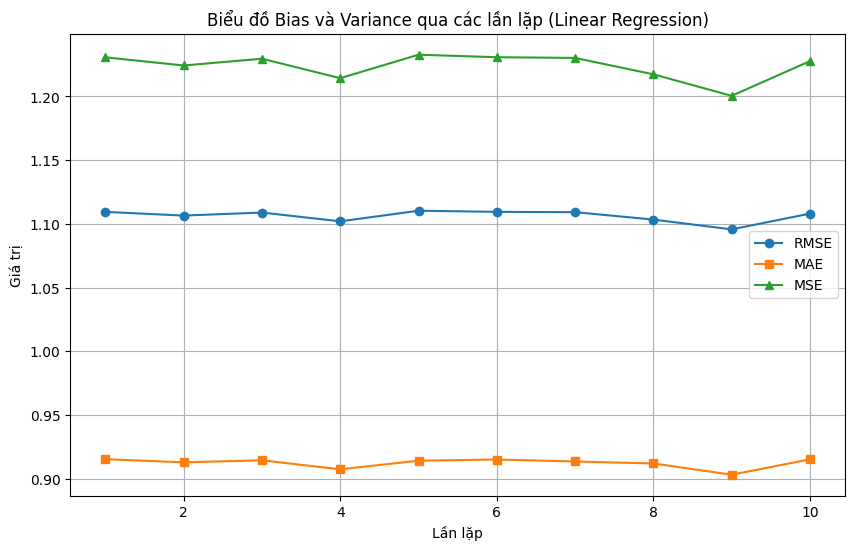

In [11]:
#ve bieu do variance va bias
iterations = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.plot(iterations, rmse_list, marker='o', label='RMSE')
plt.plot(iterations, mae_list, marker='s', label='MAE')
plt.plot(iterations, mse_list, marker='^', label='MSE')
plt.xlabel('Lần lặp')
plt.ylabel('Giá trị')
plt.title('Biểu đồ Bias và Variance qua các lần lặp (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#luu mo hinh
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Lưu mô hình thành công")

Lưu mô hình thành công
